# IMPORT DEI DATI E ANALISI

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from FisherDA import MultipleFisherDiscriminantAnalysis as MDA
from mpl_toolkits.mplot3d import Axes3D
from ucimlrepo import fetch_ucirepo 
from linear_r2 import HyperplaneR2
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, make_scorer
from sklearn.exceptions import ConvergenceWarning
import warnings
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter


## Importazione del dataset in un DataFrame pandas

In [2]:
# fetch dataset 
iranian_churn = fetch_ucirepo(id=563) 
  
# data (as pandas dataframes) 
X = iranian_churn.data.features 
y = iranian_churn.data.targets 
  
# metadata 
#print(iranian_churn.metadata) 
  
# variable information 
#print(iranian_churn.variables) 
display(X)
display(y)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640


,Churn
0,0
1,0
2,0
3,0
4,0
...,...
3145,0
3146,0
3147,0
3148,0


## Costruzione di una copia con tutti i dati

In [3]:
data=X.copy()
data['Churn']=[y['Churn'][t] for t in data['Complains']]
display(data)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [4]:
X.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000


## Studio della frequenza delle classi

In [5]:
y['Churn'].value_counts()
M, N = y.shape

In [6]:
class_cont_freq = pd.concat([y['Churn'].value_counts(), y['Churn'].value_counts()/M], axis=1)
class_cont_freq.columns = ['counts', 'freq.']  # alterantiva al metodo 'rename' cambiare il nome a tutte le colonne (comodo quando ce ne sono più di una con stesso nome)
class_cont_freq.index.name = 'class'

display(class_cont_freq)

,counts,freq.
class,,
0,2655,0.842857
1,495,0.157143


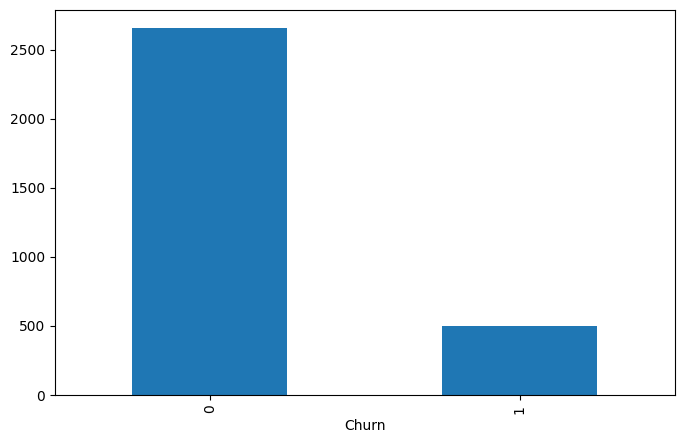

In [7]:
grafico= y['Churn'].value_counts().plot.bar(figsize=(8,5))
plt.savefig("grafico_churn.png", bbox_inches='tight')

In [8]:
## Creazione di Train, Validation e Test set

In [9]:
random_seed = 42  
test_val_p = 0.35 # Percentuale di dati da utilizzare come test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_val_p, stratify=y, random_state=random_seed, shuffle=True) 


In [10]:
#Controllo delle proporzioni

print("Train:", np.bincount(np.array(y_train).ravel()) / len(y_train))
print("Test:", np.bincount(np.array(y_test).ravel()) / len(y_test))


Train: [0.84269663 0.15730337]
Test: [0.84315503 0.15684497]


## Matrice di correlazione

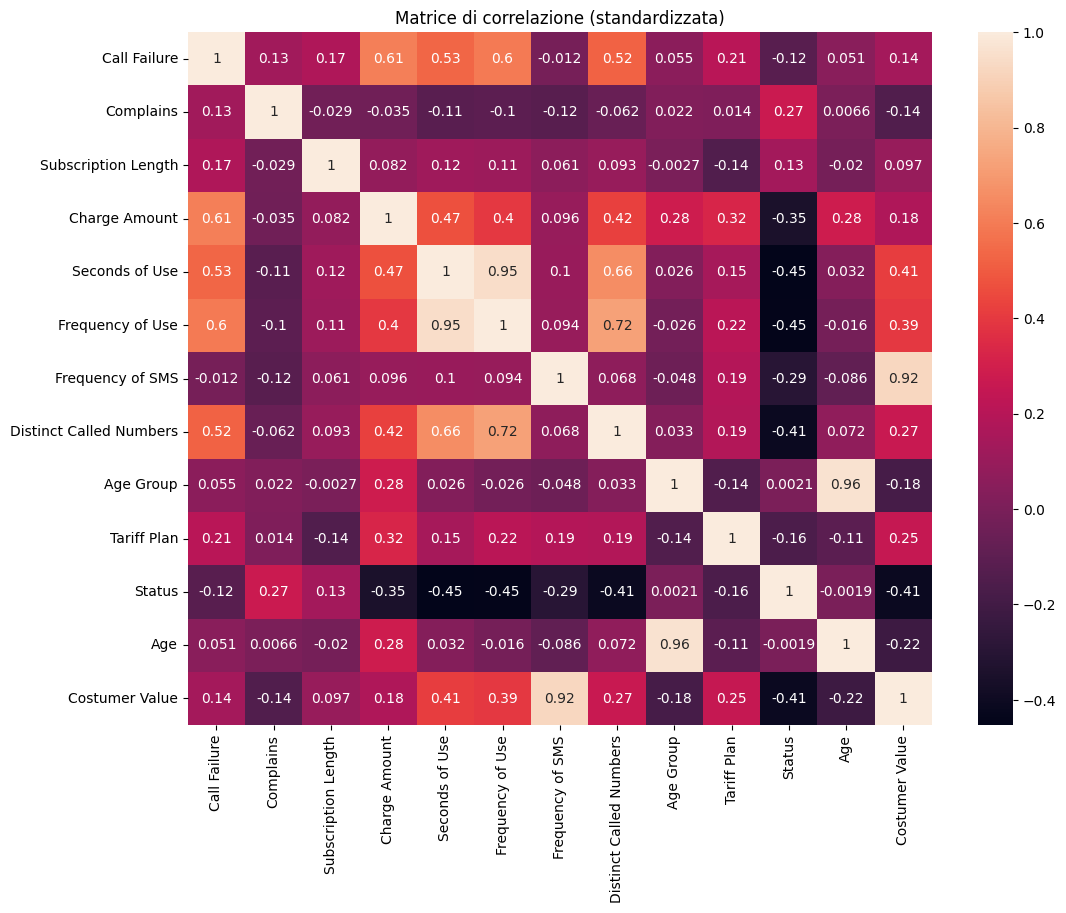

In [11]:
#Matrice di correlazione
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
col_names = ['Call Failure', 'Complains', 'Subscription Length', 'Charge Amount', 'Seconds of Use', 'Frequency of Use','Frequency of SMS','Distinct Called Numbers','Age Group','Tariff Plan','Status','Age','Costumer Value'] 

X_scaled_df = pd.DataFrame(X_scaled, columns=col_names)

plt.figure(figsize=(12, 9))
plt.title('Matrice di correlazione (standardizzata)')
Matrice_corr = X_scaled_df.corr()
sn.heatmap(Matrice_corr, annot=True)
plt.savefig("matrice_di_correlazione_standardizzata.png", bbox_inches='tight')
plt.show()

## Ricampionamento del train set con OverSample

Ricampioniamo col metodo RandomOverSampler i dati del train set

In [12]:
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

## Nuovi set con il dataset ricampionato (OverSampler)

In [13]:
#Controllo delle proporzioni interne

print("Train:", np.bincount(np.array(y_train_res).ravel()) / len(y_train_res))
print("Test:", np.bincount(np.array(y_test).ravel()) / len(y_test))

#Controllo delle nuove proporzioni tra test set e training set

print("Percentuale dati di train:",  len(y_train_res)/ (len(y_train_res)+len(y_test)))
print("Percentuale dati di test:", len(y_test) / (len(y_train_res)+len(y_test)))

Train: [0.5 0.5]
Test: [0.84315503 0.15684497]
Percentuale dati di train: 0.7577421480342631
Percentuale dati di test: 0.24225785196573688


## Ricampionamento del train set con SMOTE

In [14]:
smote = SMOTE(random_state=42)

X_train_smo, y_train_smo = smote.fit_resample(X_train, y_train) 

In [15]:
#Controllo delle proporzioni

print("Train:", np.bincount(np.array(y_train_smo).ravel()) / len(y_train_smo))
print("Test:", np.bincount(np.array(y_test).ravel()) / len(y_test))

#Controllo delle nuove proporzioni tra test set e training set

print("Percentuale dati di train:",  len(y_train_smo)/ (len(y_train_smo)+len(y_test)))
print("Percentuale dati di test:", len(y_test) / (len(y_train_smo)+len(y_test)))

Train: [0.5 0.5]
Test: [0.84315503 0.15684497]
Percentuale dati di train: 0.7577421480342631
Percentuale dati di test: 0.24225785196573688


# PCA

Faccio la PCA rispetto alla matrice Corr(X). Siccome in genere la PCA di sklearn opera sulla matrice Cov(X), 
opero prima una standardizzazione dei dati tramite uno StandardScaler

Facciamo prima la PCA sui soli dati X, senza il ricampionamento. Utilizziamo un livello di varianza spiegata pari al 95%

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)

pca_X=PCA()
pca_X.fit(X_train_scaled)

PCA()

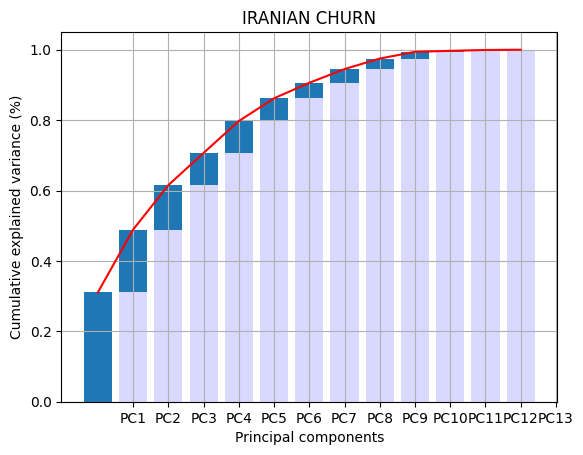

In [17]:
plt.figure()
plt.bar(np.arange(pca_X.n_features_in_), pca_X.explained_variance_ratio_, bottom=np.insert(np.cumsum(pca_X.explained_variance_ratio_), 0, 0)[:-1])
plt.bar(np.arange(pca_X.n_features_in_), np.insert(np.cumsum(pca_X.explained_variance_ratio_), 0, 0)[:-1], color='b', alpha=0.15)
plt.plot(np.cumsum(pca_X.explained_variance_ratio_), 'r')
plt.title('IRANIAN CHURN')
plt.xticks(ticks=np.arange(1, pca_X.n_features_in_ + 1), 
           labels=[f'PC{i}' for i in range(1, pca_X.n_features_in_ + 1)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance (%)')
plt.grid()
plt.savefig("Varianza_spiegata.png", bbox_inches='tight')
plt.show()

Si nota che con 9 componenti si raggiunge poco più del 95% di varianza spiegata

Per le visualizzazioni consideriamo le prime tre PC, tenendo conto che in quel caso la varianza spiegata è di poco superiore del 60%

In [18]:
pca_X_3 = PCA(n_components=3)
pca_X_3.fit(X_train_scaled)
Y=pca_X_3.transform(X_train_scaled)

## Score Graph

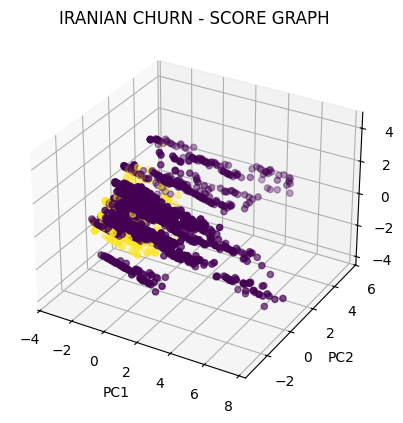

In [19]:
fig_Xscore = plt.figure()
ax = fig_Xscore.add_subplot(111, projection='3d')
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=y_train['Churn'].values)
plt.title('IRANIAN CHURN - SCORE GRAPH')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.grid()
plt.savefig("Score_Graph.png", bbox_inches='tight')
plt.show()

## Loading Graph

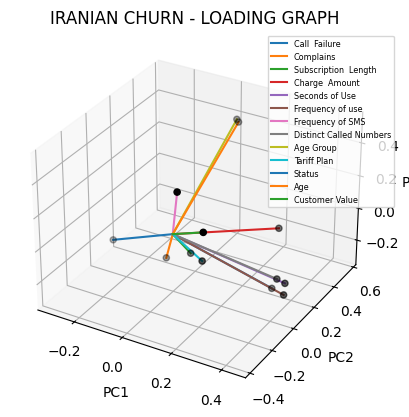

In [20]:
fig_Xscore = plt.figure()
ax = fig_Xscore.add_subplot(111, projection='3d')
for i in range(pca_X_3.n_features_in_):
    ax.plot([0, pca_X_3.components_[0, i]], [0, pca_X_3.components_[1, i]], 
            [0, pca_X_3.components_[2, i]],
             label=X.columns[i])
ax.scatter(pca_X_3.components_[0, :], pca_X_3.components_[1, :], pca_X_3.components_[2, :], c='k')
plt.legend(bbox_to_anchor=(1.05, 1), fontsize='xx-small')
plt.title('IRANIAN CHURN - LOADING GRAPH')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.grid()
plt.savefig("Loading_Graph.png", bbox_inches='tight')
plt.show()

## PCA con varianza spiegata fissata
Vediamo quante componenti servono per avere il 95% di varianza spiegata

In [21]:
pca_95 = PCA(0.95)
pca_95.fit(X_train_scaled)
df_pca = pd.DataFrame({'val': [pca_95.n_components_, pca_95.explained_variance_ratio_.sum()]}, index=['n. PC', 'expl. Var. (%)'])
display(df_pca)

,val
n. PC,9.000000
expl. Var. (%),0.974843


## Interpretazione delle PC

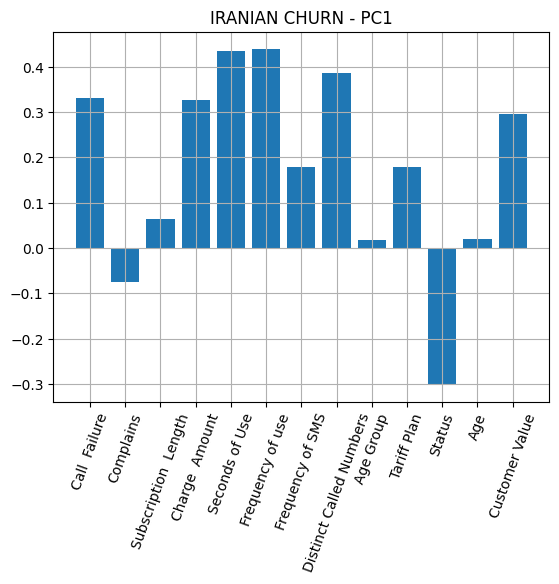

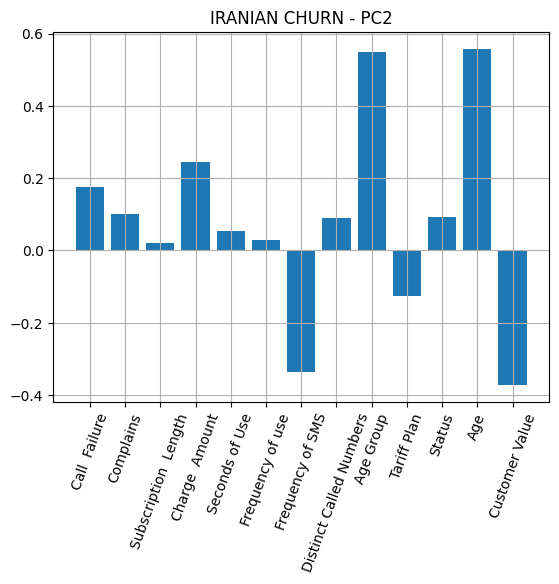

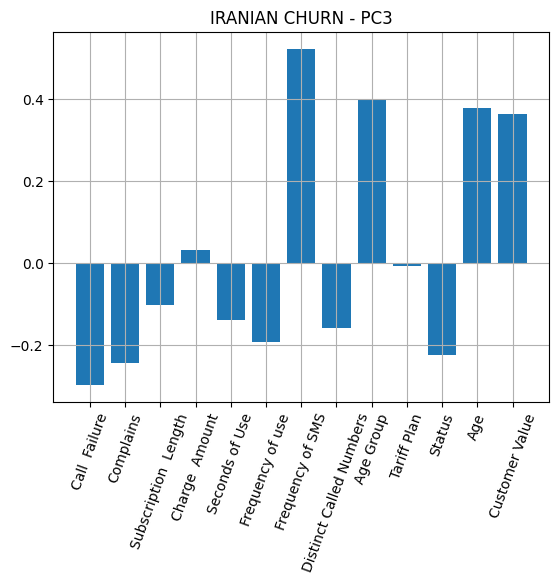

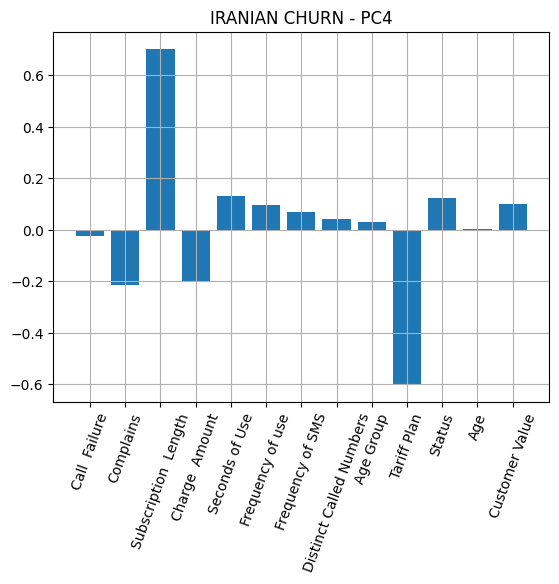

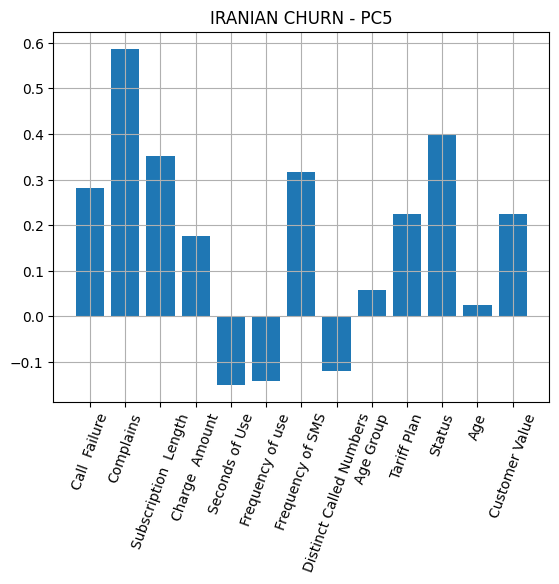

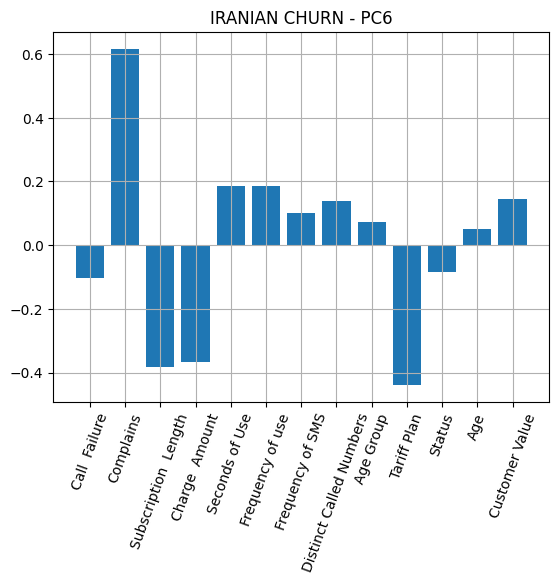

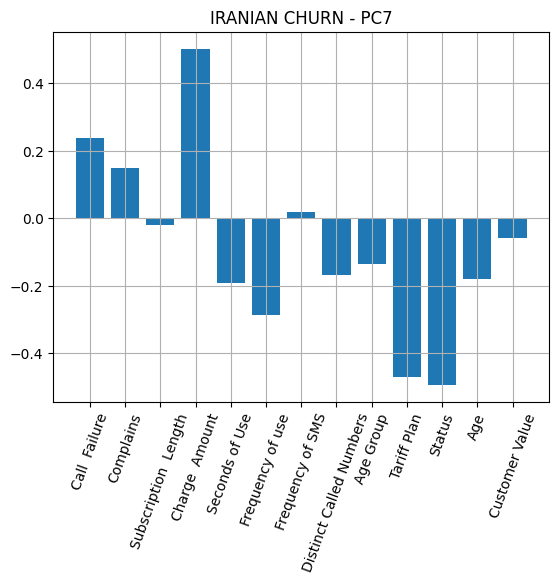

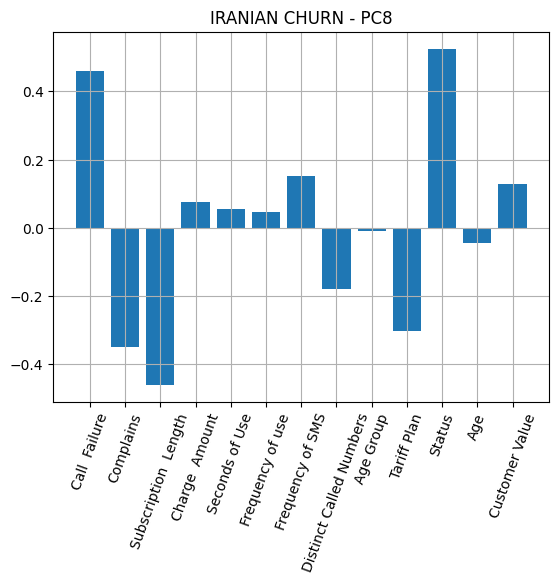

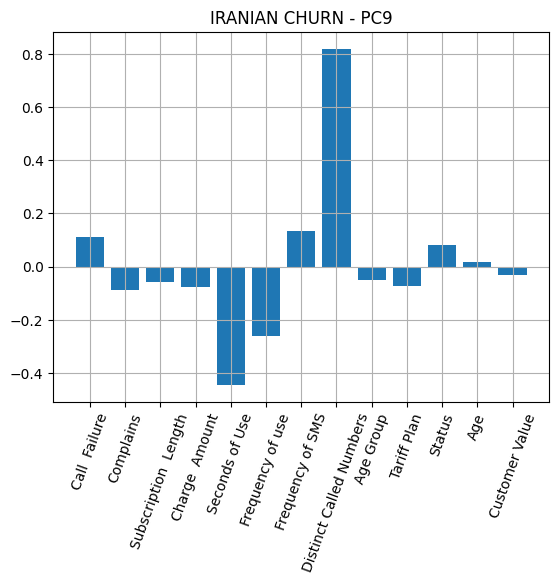

In [22]:
plt.figure()
plt.bar(np.arange(pca_X.n_features_in_), pca_X.components_[0, :])
plt.xticks(ticks=np.arange(pca_X.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN - PC1')
plt.grid()
plt.savefig("PC1.png", bbox_inches='tight')
plt.show()

plt.figure()
plt.bar(np.arange(pca_X.n_features_in_), pca_X.components_[1, :])
plt.xticks(ticks=np.arange(pca_X.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN - PC2')
plt.grid()
plt.savefig("PC2.png", bbox_inches='tight')
plt.show()

plt.figure()
plt.bar(np.arange(pca_X.n_features_in_), pca_X.components_[2, :])
plt.xticks(ticks=np.arange(pca_X.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN - PC3')
plt.grid()
plt.savefig("PC3.png", bbox_inches='tight')
plt.show()

plt.figure()
plt.bar(np.arange(pca_X.n_features_in_), pca_X.components_[3, :])
plt.xticks(ticks=np.arange(pca_X.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN - PC4')
plt.grid()
plt.savefig("PC4.png", bbox_inches='tight')
plt.show()

plt.figure()
plt.bar(np.arange(pca_X.n_features_in_), pca_X.components_[4, :])
plt.xticks(ticks=np.arange(pca_X.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN - PC5')
plt.grid()
plt.savefig("PC5.png", bbox_inches='tight')
plt.show()

plt.figure()
plt.bar(np.arange(pca_X.n_features_in_), pca_X.components_[5, :])
plt.xticks(ticks=np.arange(pca_X.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN - PC6')
plt.grid()
plt.savefig("PC6.png", bbox_inches='tight')
plt.show()

plt.figure()
plt.bar(np.arange(pca_X.n_features_in_), pca_X.components_[6, :])
plt.xticks(ticks=np.arange(pca_X.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN - PC7')
plt.grid()
plt.savefig("PC7.png", bbox_inches='tight')
plt.show()

plt.figure()
plt.bar(np.arange(pca_X.n_features_in_), pca_X.components_[7, :])
plt.xticks(ticks=np.arange(pca_X.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN - PC8')
plt.grid()
plt.savefig("PC8.png", bbox_inches='tight')
plt.show()

plt.figure()
plt.bar(np.arange(pca_X.n_features_in_), pca_X.components_[8, :])
plt.xticks(ticks=np.arange(pca_X.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN - PC9')
plt.grid()
plt.savefig("PC9.png", bbox_inches='tight')
plt.show()

## Dati Ricampionati con OverSampler

Rifacciamo tutto quello che è stato fatto coi dati originali presi dal dataset, ma con i dati ricampionati.
Vediamo se ci sono delle differenze sostanziali. Di seguito la PCA sui dati ricampionati con ROS

In [23]:
scaler_r = StandardScaler()
scaler_r.fit(X_train_res)
X_scaled_r= scaler_r.transform(X_train_res)

pca_X_r=PCA()
pca_X_r.fit(X_scaled_r)

PCA()

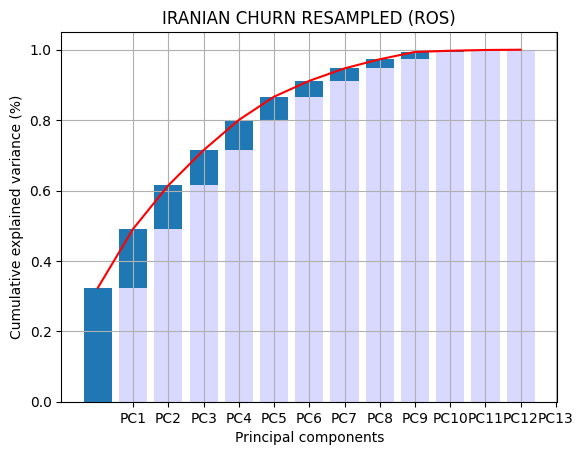

In [24]:
plt.figure()
plt.bar(np.arange(pca_X_r.n_features_in_), pca_X_r.explained_variance_ratio_, bottom=np.insert(np.cumsum(pca_X_r.explained_variance_ratio_), 0, 0)[:-1])
plt.bar(np.arange(pca_X_r.n_features_in_), np.insert(np.cumsum(pca_X_r.explained_variance_ratio_), 0, 0)[:-1], color='b', alpha=0.15)
plt.plot(np.cumsum(pca_X_r.explained_variance_ratio_), 'r')
plt.title('IRANIAN CHURN RESAMPLED (ROS)')
plt.xticks(ticks=np.arange(1, pca_X_r.n_features_in_ + 1), 
           labels=[f'PC{i}' for i in range(1, pca_X_r.n_features_in_ + 1)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance (%)')
plt.grid()
plt.show()

Praticamente identico

In [25]:
pca_X_3_r = PCA(n_components=3)
pca_X_3_r.fit(X_scaled_r)
Y_r =pca_X_3_r.transform(X_scaled_r)

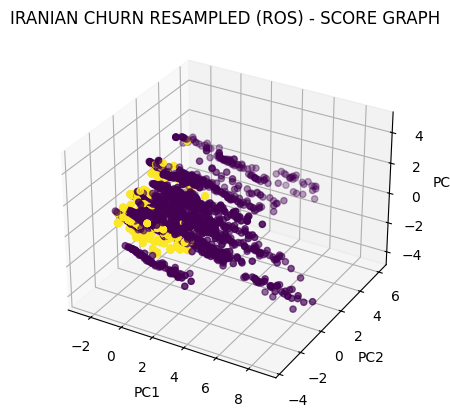

In [26]:
fig_Xscore_r = plt.figure()
ax = fig_Xscore_r.add_subplot(111, projection='3d')
ax.scatter(Y_r[:, 0], Y_r[:, 1], Y_r[:, 2], c=y_train_res['Churn'].values)
plt.title('IRANIAN CHURN RESAMPLED (ROS) - SCORE GRAPH')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.grid()
plt.show()

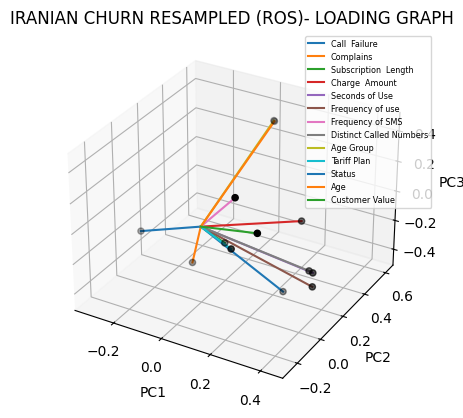

In [27]:
fig_Xscore_r = plt.figure()
ax = fig_Xscore_r.add_subplot(111, projection='3d')
for i in range(pca_X_3_r.n_features_in_):
    ax.plot([0, pca_X_3_r.components_[0, i]], [0, pca_X_3_r.components_[1, i]], 
            [0, pca_X_3_r.components_[2, i]],
             label=X_train_res.columns[i])
ax.scatter(pca_X_3_r.components_[0, :], pca_X_3_r.components_[1, :], pca_X_3_r.components_[2, :], c='k')
plt.legend(bbox_to_anchor=(1.05, 1), fontsize='xx-small')
plt.title('IRANIAN CHURN RESAMPLED (ROS)- LOADING GRAPH')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.grid()
plt.show()

In [28]:
pca_95_r = PCA(0.95)
pca_95_r.fit(X_scaled_r)
df_pca_r = pd.DataFrame({'val': [pca_95_r.n_components_, pca_95_r.explained_variance_ratio_.sum()]}, index=['n. PC', 'expl. Var. (%)'])
display(df_pca_r)

,val
n. PC,9.00000
expl. Var. (%),0.97285


,val
n. PC,9.00000
expl. Var. (%),0.97285


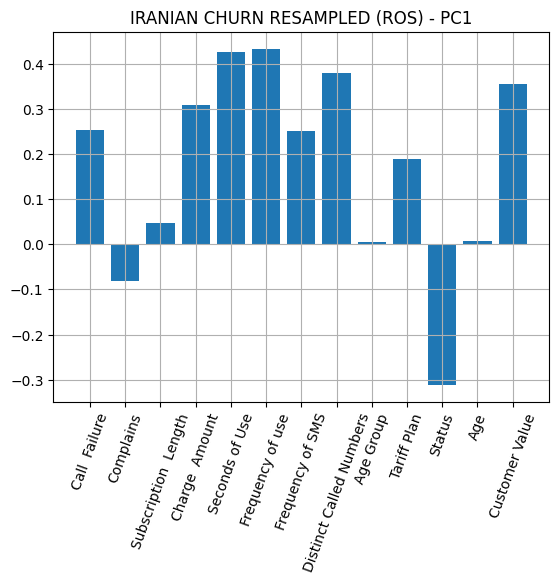

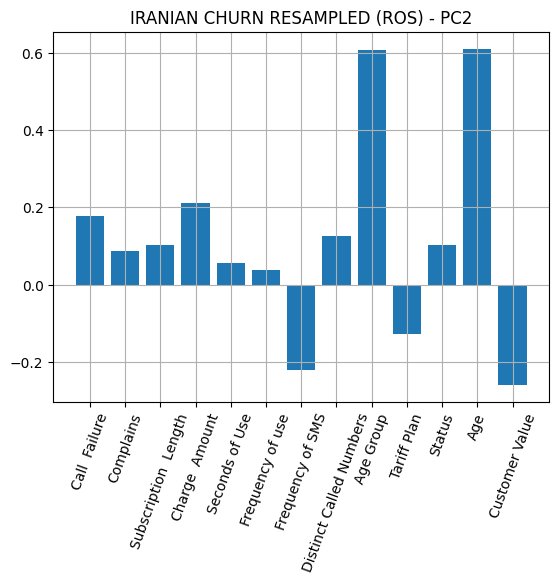

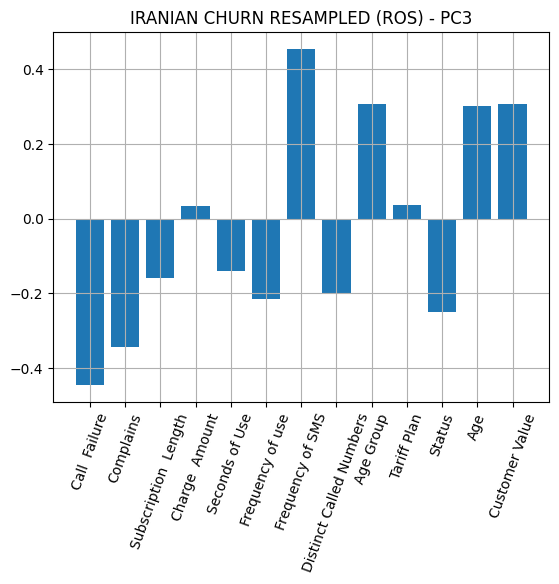

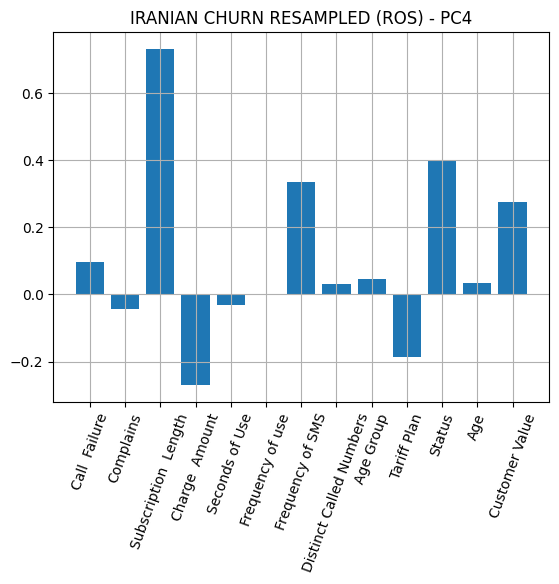

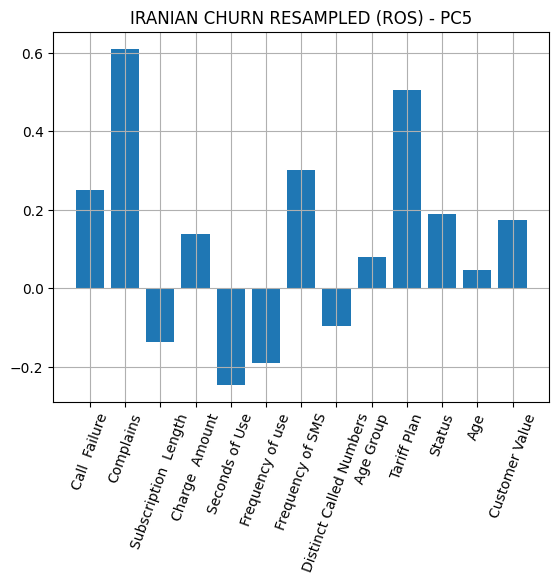

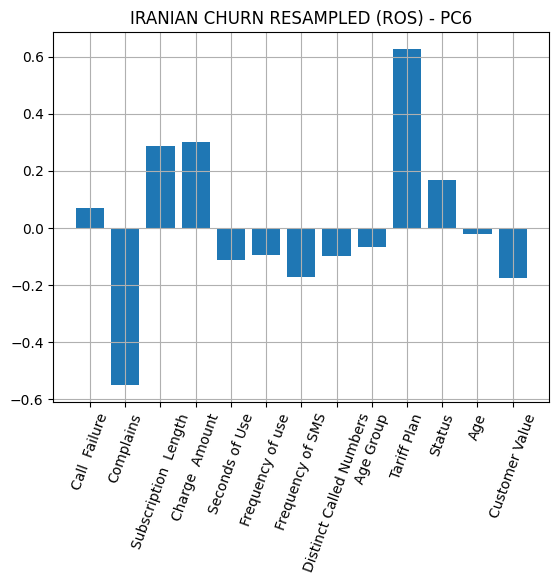

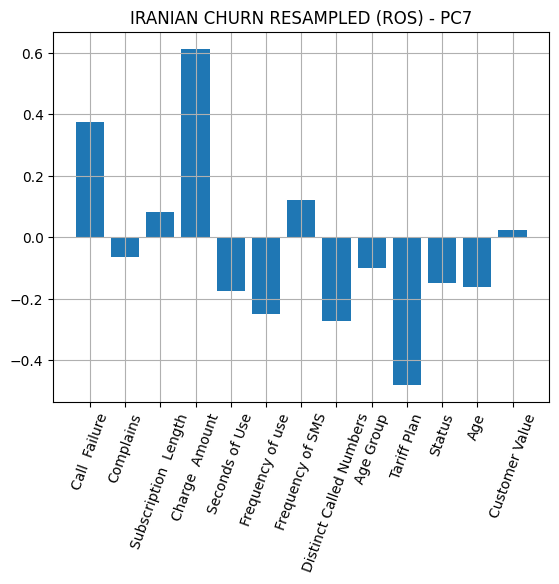

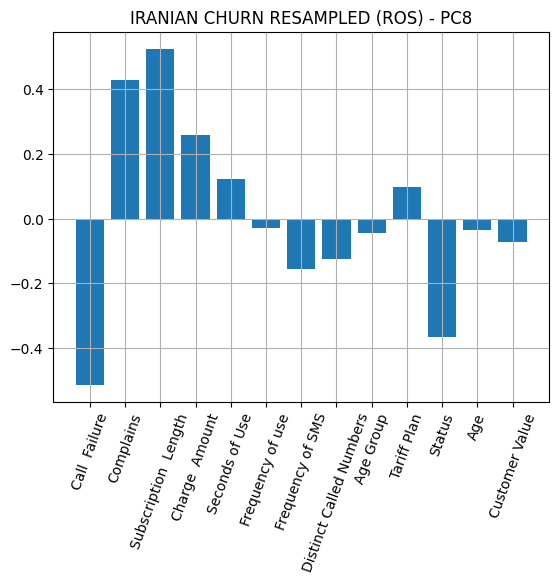

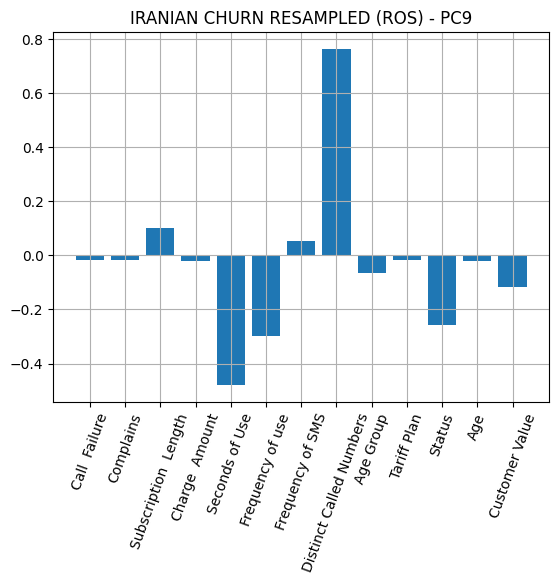

In [29]:
pca_95_r = PCA(0.95)
pca_95_r.fit(X_scaled_r)
df_pca_r = pd.DataFrame({'val': [pca_95_r.n_components_, pca_95_r.explained_variance_ratio_.sum()]}, index=['n. PC', 'expl. Var. (%)'])
display(df_pca_r)
plt.figure()
plt.bar(np.arange(pca_X_r.n_features_in_), pca_X_r.components_[0, :])
plt.xticks(ticks=np.arange(pca_X_r.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN RESAMPLED (ROS) - PC1')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_X_r.n_features_in_), pca_X_r.components_[1, :])
plt.xticks(ticks=np.arange(pca_X_r.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN RESAMPLED (ROS) - PC2')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_X_r.n_features_in_), pca_X_r.components_[2, :])
plt.xticks(ticks=np.arange(pca_X_r.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN RESAMPLED (ROS) - PC3')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_X_r.n_features_in_), pca_X_r.components_[3, :])
plt.xticks(ticks=np.arange(pca_X_r.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN RESAMPLED (ROS) - PC4')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_X_r.n_features_in_), pca_X_r.components_[4, :])
plt.xticks(ticks=np.arange(pca_X_r.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN RESAMPLED (ROS) - PC5')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_X_r.n_features_in_), pca_X_r.components_[5, :])
plt.xticks(ticks=np.arange(pca_X_r.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN RESAMPLED (ROS) - PC6')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_X_r.n_features_in_), pca_X_r.components_[6, :])
plt.xticks(ticks=np.arange(pca_X_r.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN RESAMPLED (ROS) - PC7')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_X_r.n_features_in_), pca_X_r.components_[7, :])
plt.xticks(ticks=np.arange(pca_X_r.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN RESAMPLED (ROS) - PC8')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_X_r.n_features_in_), pca_X_r.components_[8, :])
plt.xticks(ticks=np.arange(pca_X_r.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN RESAMPLED (ROS) - PC9')
plt.grid()
plt.show()

## Dati ricampionati con SMOTE

Rifacciamo tutto quello che è stato fatto coi dati originali presi dal dataset, ma con i dati ricampionati.
Vediamo se ci sono delle differenze sostanziali. Di seguito la PCA sui dati ricampionati con SMOTE

In [30]:
scaler_smo = StandardScaler()
scaler_smo.fit(X_train_smo)
X_scaled_smo= scaler_smo.transform(X_train_smo)

pca_X_smo=PCA()
pca_X_smo.fit(X_scaled_smo)

PCA()

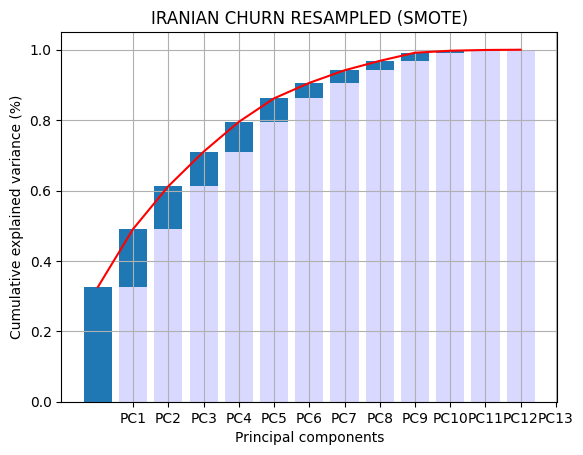

In [31]:
plt.figure()
plt.bar(np.arange(pca_X_smo.n_features_in_), pca_X_smo.explained_variance_ratio_, bottom=np.insert(np.cumsum(pca_X_smo.explained_variance_ratio_), 0, 0)[:-1])
plt.bar(np.arange(pca_X_smo.n_features_in_), np.insert(np.cumsum(pca_X_smo.explained_variance_ratio_), 0, 0)[:-1], color='b', alpha=0.15)
plt.plot(np.cumsum(pca_X_smo.explained_variance_ratio_), 'r')
plt.title('IRANIAN CHURN RESAMPLED (SMOTE)')
plt.xticks(ticks=np.arange(1, pca_X_smo.n_features_in_ + 1), 
           labels=[f'PC{i}' for i in range(1, pca_X_smo.n_features_in_ + 1)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance (%)')
plt.grid()
plt.show()

In [32]:
pca_X_3_smo = PCA(n_components=3)
pca_X_3_smo.fit(X_scaled_smo)
Y_smo =pca_X_3_smo.transform(X_scaled_smo)

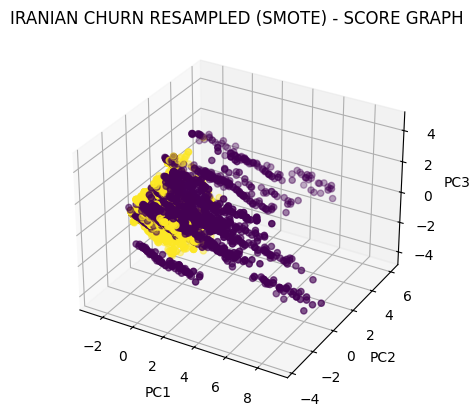

In [33]:
fig_Xscore_smo= plt.figure()
ax = fig_Xscore_smo.add_subplot(111, projection='3d')
ax.scatter(Y_smo[:, 0], Y_smo[:, 1], Y_smo[:, 2], c=y_train_smo['Churn'].values)
plt.title('IRANIAN CHURN RESAMPLED (SMOTE) - SCORE GRAPH')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.grid()
plt.show()

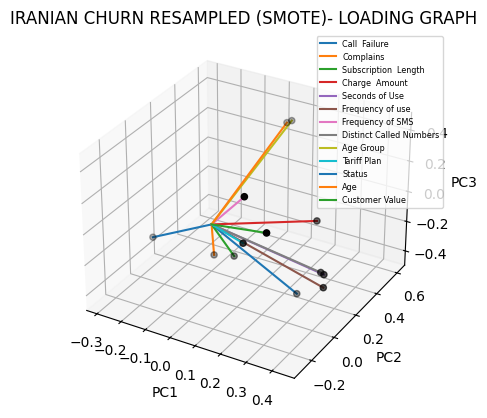

In [34]:
fig_Xscore_smo = plt.figure()
ax = fig_Xscore_smo.add_subplot(111, projection='3d')
for i in range(pca_X_3_smo.n_features_in_):
    ax.plot([0, pca_X_3_smo.components_[0, i]], [0, pca_X_3_smo.components_[1, i]], 
            [0, pca_X_3_smo.components_[2, i]],
             label=X_train_smo.columns[i])
ax.scatter(pca_X_3_smo.components_[0, :], pca_X_3_smo.components_[1, :], pca_X_3_smo.components_[2, :], c='k')
plt.legend(bbox_to_anchor=(1.05, 1), fontsize='xx-small')
plt.title('IRANIAN CHURN RESAMPLED (SMOTE)- LOADING GRAPH')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.grid()
plt.show()

In [35]:
pca_95_smo = PCA(0.95)
pca_95_smo.fit(X_scaled_smo)
df_pca_smo = pd.DataFrame({'val': [pca_95_smo.n_components_, pca_95_smo.explained_variance_ratio_.sum()]}, index=['n. PC', 'expl. Var. (%)'])
display(df_pca_smo)

,val
n. PC,9.00000
expl. Var. (%),0.96834


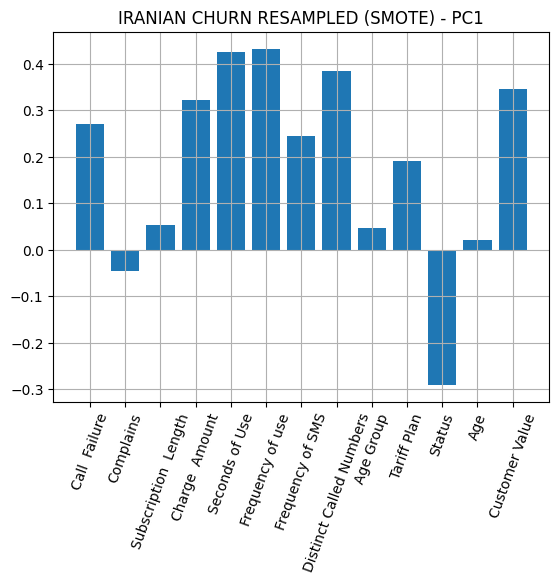

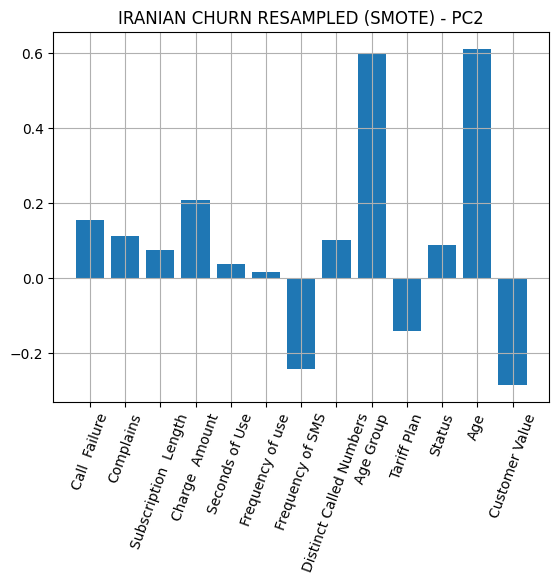

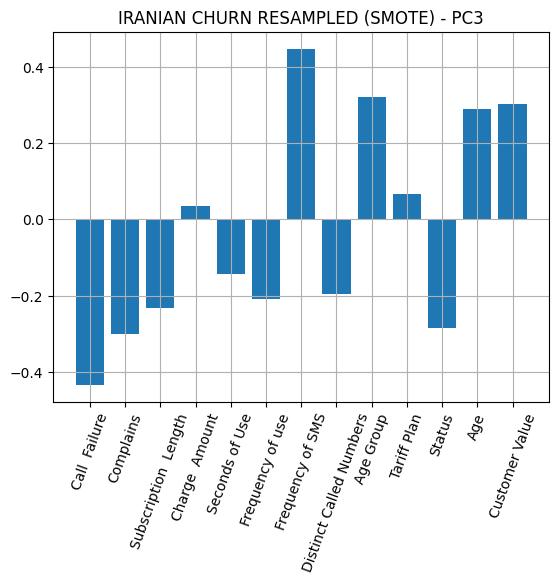

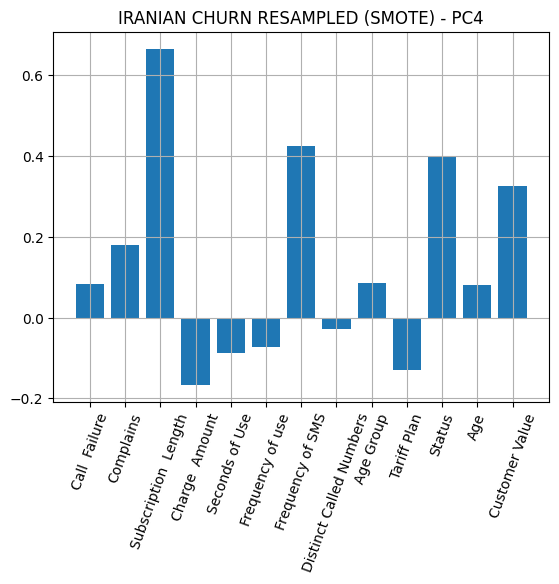

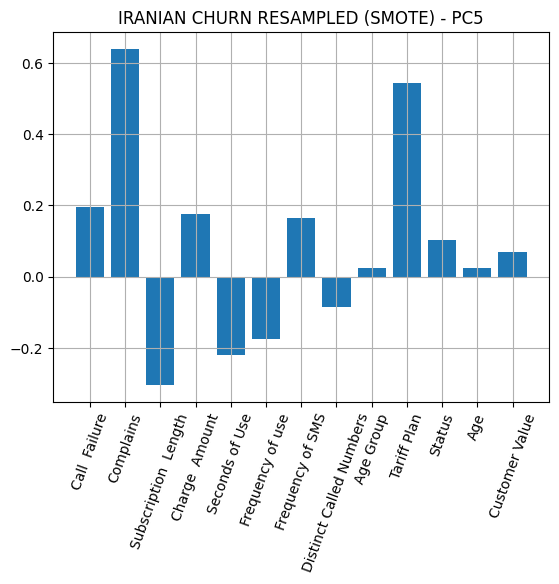

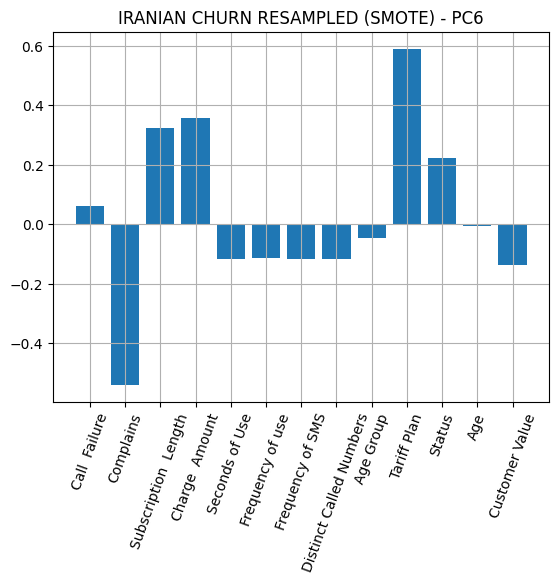

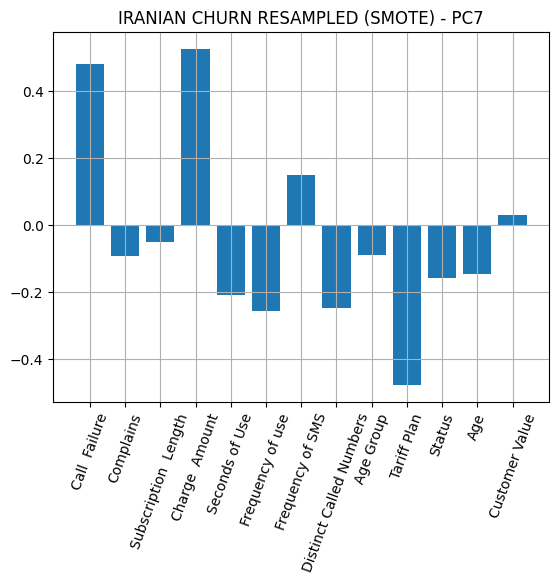

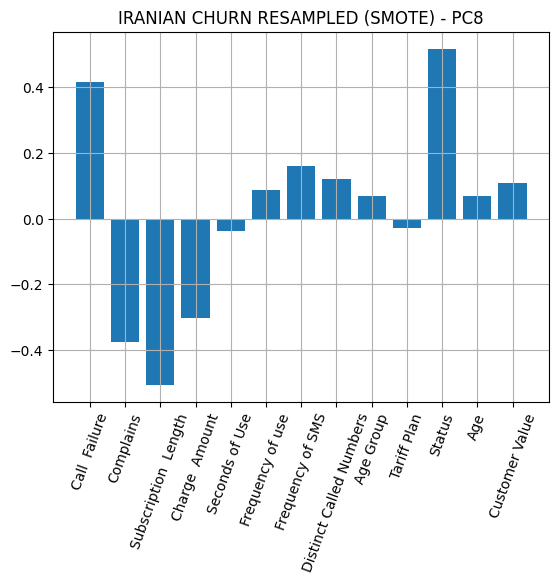

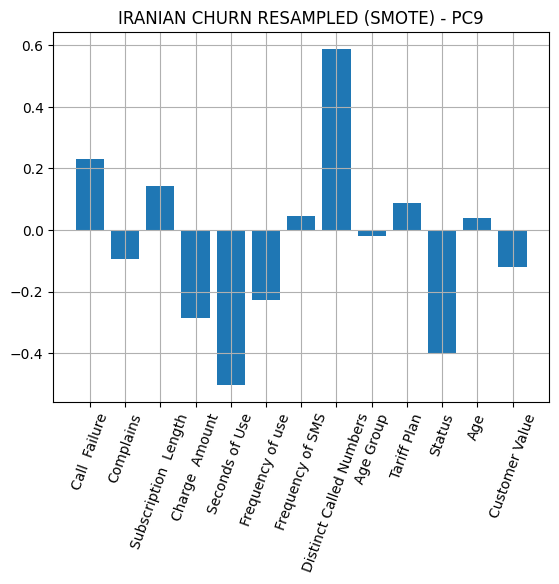

In [36]:
plt.figure()
plt.bar(np.arange(pca_X_smo.n_features_in_), pca_X_smo.components_[0, :])
plt.xticks(ticks=np.arange(pca_X_smo.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN RESAMPLED (SMOTE) - PC1')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_X_smo.n_features_in_), pca_X_smo.components_[1, :])
plt.xticks(ticks=np.arange(pca_X_smo.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN RESAMPLED (SMOTE) - PC2')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_X_smo.n_features_in_), pca_X_smo.components_[2, :])
plt.xticks(ticks=np.arange(pca_X_smo.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN RESAMPLED (SMOTE) - PC3')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_X_smo.n_features_in_), pca_X_smo.components_[3, :])
plt.xticks(ticks=np.arange(pca_X_smo.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN RESAMPLED (SMOTE) - PC4')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_X_smo.n_features_in_), pca_X_smo.components_[4, :])
plt.xticks(ticks=np.arange(pca_X_smo.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN RESAMPLED (SMOTE) - PC5')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_X_smo.n_features_in_), pca_X_smo.components_[5, :])
plt.xticks(ticks=np.arange(pca_X_smo.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN RESAMPLED (SMOTE) - PC6')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_X_smo.n_features_in_), pca_X_smo.components_[6, :])
plt.xticks(ticks=np.arange(pca_X_smo.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN RESAMPLED (SMOTE) - PC7')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_X_smo.n_features_in_), pca_X_smo.components_[7, :])
plt.xticks(ticks=np.arange(pca_X_smo.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN RESAMPLED (SMOTE) - PC8')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_X_smo.n_features_in_), pca_X_smo.components_[8, :])
plt.xticks(ticks=np.arange(pca_X_smo.n_features_in_), 
           labels=X.columns.to_list(),
           rotation=70)
plt.title('IRANIAN CHURN RESAMPLED (SMOTE) - PC9')
plt.grid()
plt.show()

# FDA

Avendo soltanto due classi, la FDA proietta su uno spazio di dimensione 1 cercando di massimizzare la distanza tra le medie delle classi e di minimizzare la varianza

C:\Users\Ulderico\OneDrive\Documenti\Università\Matematica per l'Intelligenza Artificiale\Della Santa\MIAenv\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Ulderico\OneDrive\Documenti\Università\Matematica per l'Intelligenza Artificiale\Della Santa\MIAenv\Lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


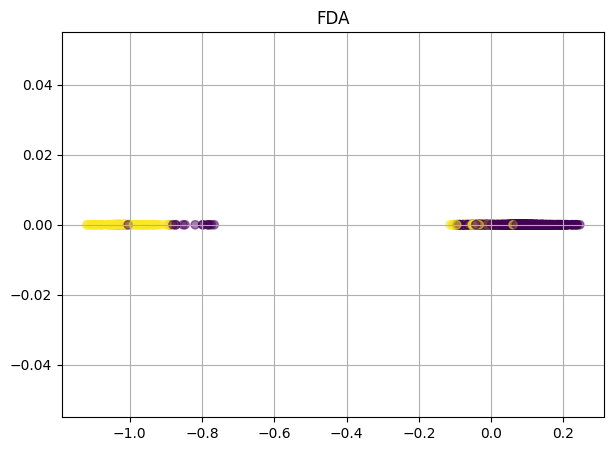

In [37]:
fda = MDA()
y_train=y_train.iloc[:, 0]
fda.fit(X_train.values,y_train.values)
Zfda = fda.transform(X_train.values)
fig1, axs1 = plt.subplots(figsize=(7, 5))
axs1.scatter(Zfda[:, 0], [0]*len(Zfda), c=y_train, alpha=0.5)
axs1.set_title('FDA')
fig1.savefig("FDA.png", bbox_inches='tight')
axs1.grid()

# SVM lineare

In [38]:
# ridivido i dati per avere compatibilità

X = X.values
y = y['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_val_p, stratify=y, random_state=random_seed, shuffle=True) 

ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

smote = SMOTE(random_state=42)
X_train_smo, y_train_smo = smote.fit_resample(X_train, y_train) 

## Training set originale

### PCA preliminare

In [39]:
# faccio la PCA scalando i dati 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

pca = PCA(n_components = 2)
pca.fit(X_train_scaled)
df_pca = pd.DataFrame({'val': [pca.n_components_, pca.explained_variance_ratio_.sum()]}, index=['n. PC', 'expl. Var. (%)'])
display(df_pca)

,val
n. PC,2.000000
expl. Var. (%),0.489144


### Calcolo del SVM

In [40]:
# applico la SVM ai dati con la PCA e senza la PCA 
C_hard = 1e10 # è alto per imitare una SVM hard in quanto in sklearn non esiste
loss = 'squared_hinge'
dual = False
random_seed = 42

lsvm_hard = LinearSVC(C=C_hard, loss=loss, dual=dual, random_state=random_seed)
lsvm_hard_pca = LinearSVC(C=C_hard, loss=loss, dual=dual, random_state=random_seed)

lsvm_hard.fit(X_train, y_train)
lsvm_hard_pca.fit(pca.transform(X_train), y_train)

df_lsvm_hard = pd.DataFrame({'acc. (no PCA)': [lsvm_hard.score(X_train, y_train), lsvm_hard.score(X_test, y_test)],
                             'acc. (PCA)': [lsvm_hard_pca.score(pca.transform(X_train), y_train), lsvm_hard_pca.score(pca.transform(X_test), y_test)]},
                            index=['training', 'test'])
display(df_lsvm_hard)

y_pred = lsvm_hard.predict(X_test)
print(classification_report(y_test, y_pred))


,acc. (no PCA),acc. (PCA)
training,0.899365,0.842697
test,0.896646,0.843155


              precision    recall  f1-score   support

           0       0.90      0.99      0.94       930
           1       0.86      0.41      0.55       173

    accuracy                           0.90      1103
   macro avg       0.88      0.70      0.75      1103
weighted avg       0.89      0.90      0.88      1103



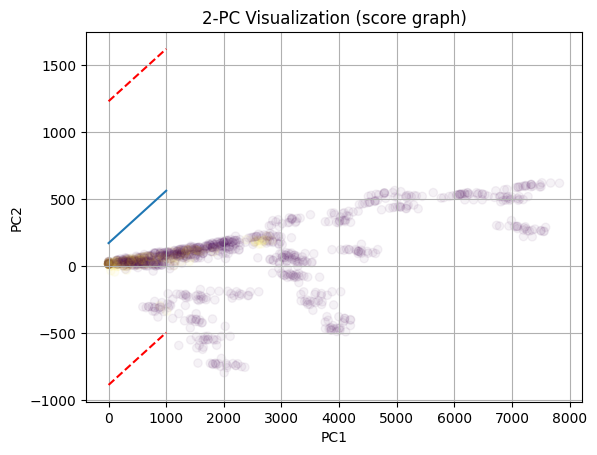

In [41]:
# Pesi retta (iperpiano di R^2) separatrice
w_hard = lsvm_hard_pca.coef_
b_hard = lsvm_hard_pca.intercept_

# Inizializzazione retta separatrice
line_hard = HyperplaneR2(w_hard, b_hard)

Zpca = pca.transform(X_test)

plt.figure()
plt.scatter(Zpca[:, 0], Zpca[:, 1], c=y_test, alpha=0.05)
plt.plot([0., 1000.], [line_hard.line_x2(0.), line_hard.line_x2(1000.)], label='sep. hyperplane (svm)')
plt.plot([0., 1000.], [line_hard.margin_x2(0.)[0], line_hard.margin_x2(1000.)[0]], 'r--', label='margin border')
plt.plot([0., 1000.], [line_hard.margin_x2(0.)[1], line_hard.margin_x2(1000.)[1]], 'r--')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.title('2-PC Visualization (score graph)')
plt.savefig('SVM_lineare_1.png', dpi=300, bbox_inches='tight')

## Training set ricampionato con ROS

In [42]:
X_train = X_train_res
y_train = y_train_res

### PCA preliminare

In [43]:
# faccio la PCA scalando i dati 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

pca = PCA(n_components = 2)
pca.fit(X_train_scaled)
df_pca = pd.DataFrame({'val': [pca.n_components_, pca.explained_variance_ratio_.sum()]}, index=['n. PC', 'expl. Var. (%)'])
display(df_pca)

,val
n. PC,2.000000
expl. Var. (%),0.491199


### Calcolo del SVM

In [44]:
# applico la SVM ai dati con la PCA e senza la PCA 
C_hard = 1e10 # è alto per imitare una SVM hard in quanto in sklearn non esiste
loss = 'squared_hinge'
dual = False
random_seed = 42

lsvm_hard = LinearSVC(C=C_hard, loss=loss, dual=dual, random_state=random_seed)
lsvm_hard_pca = LinearSVC(C=C_hard, loss=loss, dual=dual, random_state=random_seed)

lsvm_hard.fit(X_train, y_train)
lsvm_hard_pca.fit(pca.transform(X_train), y_train)

df_lsvm_hard = pd.DataFrame({'acc. (no PCA)': [lsvm_hard.score(X_train, y_train), lsvm_hard.score(X_test, y_test)],
                             'acc. (PCA)': [lsvm_hard_pca.score(pca.transform(X_train), y_train), lsvm_hard_pca.score(pca.transform(X_test), y_test)]},
                            index=['training', 'test'])
display(df_lsvm_hard)

y_pred = lsvm_hard.predict(X_test)
print(classification_report(y_test, y_pred))

,acc. (no PCA),acc. (PCA)
training,0.870435,0.756812
test,0.829556,0.664551


              precision    recall  f1-score   support

           0       0.98      0.82      0.89       930
           1       0.48      0.90      0.62       173

    accuracy                           0.83      1103
   macro avg       0.73      0.86      0.76      1103
weighted avg       0.90      0.83      0.85      1103



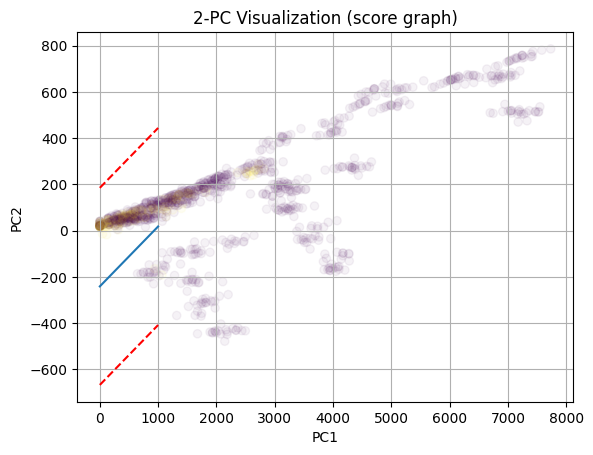

In [45]:
# Pesi retta (iperpiano di R^2) separatrice
w_hard = lsvm_hard_pca.coef_
b_hard = lsvm_hard_pca.intercept_

# Inizializzazione retta separatrice
line_hard = HyperplaneR2(w_hard, b_hard)

Zpca = pca.transform(X_test)

plt.figure()
plt.scatter(Zpca[:, 0], Zpca[:, 1], c=y_test, alpha=0.05)
plt.plot([0., 1000.], [line_hard.line_x2(0.), line_hard.line_x2(1000.)], label='sep. hyperplane (svm)')
plt.plot([0., 1000.], [line_hard.margin_x2(0.)[0], line_hard.margin_x2(1000.)[0]], 'r--', label='margin border')
plt.plot([0., 1000.], [line_hard.margin_x2(0.)[1], line_hard.margin_x2(1000.)[1]], 'r--')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.title('2-PC Visualization (score graph)')
plt.savefig('SVM_lineare_2.png', dpi=300, bbox_inches='tight')

## Training set ricampionato con SMOTE

In [46]:
X_train = X_train_smo
y_train = y_train_smo

### PCA preliminare

In [47]:
# faccio la PCA scalando i dati 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

pca = PCA(n_components = 2)
pca.fit(X_train_scaled)
df_pca = pd.DataFrame({'val': [pca.n_components_, pca.explained_variance_ratio_.sum()]}, index=['n. PC', 'expl. Var. (%)'])
display(df_pca)

,val
n. PC,2.000000
expl. Var. (%),0.499166


### Calcolo del SVM

In [48]:
# applico la SVM ai dati con la PCA e senza la PCA 
C_hard = 1e10 # è alto per imitare una SVM hard in quanto in sklearn non esiste
loss = 'squared_hinge'
dual = False
random_seed = 42

lsvm_hard = LinearSVC(C=C_hard, loss=loss, dual=dual, random_state=random_seed)
lsvm_hard_pca = LinearSVC(C=C_hard, loss=loss, dual=dual, random_state=random_seed)

lsvm_hard.fit(X_train, y_train)
lsvm_hard_pca.fit(pca.transform(X_train), y_train)

df_lsvm_hard = pd.DataFrame({'acc. (no PCA)': [lsvm_hard.score(X_train, y_train), lsvm_hard.score(X_test, y_test)],
                             'acc. (PCA)': [lsvm_hard_pca.score(pca.transform(X_train), y_train), lsvm_hard_pca.score(pca.transform(X_test), y_test)]},
                            index=['training', 'test'])
display(df_lsvm_hard)

y_pred = lsvm_hard.predict(X_test)
print(classification_report(y_test, y_pred))

,acc. (no PCA),acc. (PCA)
training,0.884928,0.763188
test,0.840435,0.665458


              precision    recall  f1-score   support

           0       0.97      0.83      0.90       930
           1       0.50      0.87      0.63       173

    accuracy                           0.84      1103
   macro avg       0.73      0.85      0.76      1103
weighted avg       0.90      0.84      0.86      1103



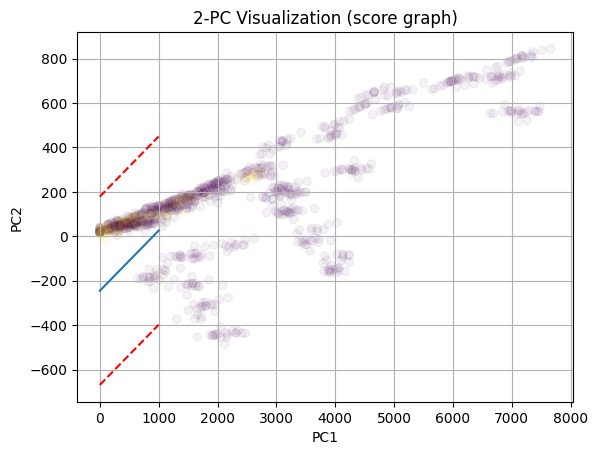

In [49]:
# Pesi retta (iperpiano di R^2) separatrice
w_hard = lsvm_hard_pca.coef_
b_hard = lsvm_hard_pca.intercept_

# Inizializzazione retta separatrice
line_hard = HyperplaneR2(w_hard, b_hard)

Zpca = pca.transform(X_test)

plt.figure()
plt.scatter(Zpca[:, 0], Zpca[:, 1], c=y_test, alpha=0.05)
plt.plot([0., 1000.], [line_hard.line_x2(0.), line_hard.line_x2(1000.)], label='sep. hyperplane (svm)')
plt.plot([0., 1000.], [line_hard.margin_x2(0.)[0], line_hard.margin_x2(1000.)[0]], 'r--', label='margin border')
plt.plot([0., 1000.], [line_hard.margin_x2(0.)[1], line_hard.margin_x2(1000.)[1]], 'r--')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.title('2-PC Visualization (score graph)')
plt.savefig('SVM_lineare_3.png', dpi=300, bbox_inches='tight')

# SVM non lineare

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_val_p, stratify=y, random_state=random_seed, shuffle=True) 

## Training set originale

### PCA preliminare

In [51]:
# faccio la PCA scalando i dati 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

pca = PCA(n_components = 2)
pca.fit(X_train_scaled)
df_pca = pd.DataFrame({'val': [pca.n_components_, pca.explained_variance_ratio_.sum()]}, index=['n. PC', 'expl. Var. (%)'])
display(df_pca)

,val
n. PC,2.000000
expl. Var. (%),0.489144


### Calcolo del SVM

In [52]:
# faccio una SVM non lineare provando con vari kernel

random_state = 42
ker_rbf = 'rbf'
gamma_rbf = 'auto'

C1 = 5
C2 = 1e2

# Inizializzazione SVM
svm_rbf_1 = SVC(C=C1, kernel=ker_rbf, gamma=gamma_rbf, random_state=random_state)
svm_rbf_2 = SVC(C=C2, kernel=ker_rbf, gamma=gamma_rbf, random_state=random_state)

# Addestramento SVM
svm_rbf_1.fit(X_train, y_train)
svm_rbf_2.fit(X_train, y_train)

# Dataframe con accuratezza su training e test set (visualizzare con funzione 'display')
df_svm_rbf = pd.DataFrame({'acc. (C1)': [svm_rbf_1.score(X_train, y_train), svm_rbf_1.score(X_test, y_test)],
                           'acc. (C2)': [svm_rbf_2.score(X_train, y_train), svm_rbf_2.score(X_test, y_test)]},
                          index=['training', 'test'])
display(df_svm_rbf)

y_pred = svm_rbf_1.predict(X_test)
print(classification_report(y_test, y_pred))

y_pred = svm_rbf_2.predict(X_test)
print(classification_report(y_test, y_pred))

,acc. (C1),acc. (C2)
training,0.988764,0.992184
test,0.873073,0.870354


              precision    recall  f1-score   support

           0       0.87      0.99      0.93       930
           1       0.84      0.24      0.37       173

    accuracy                           0.87      1103
   macro avg       0.86      0.61      0.65      1103
weighted avg       0.87      0.87      0.84      1103

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       930
           1       0.83      0.22      0.35       173

    accuracy                           0.87      1103
   macro avg       0.85      0.61      0.64      1103
weighted avg       0.87      0.87      0.84      1103



In [53]:
# faccio una svm non lineare sui dati dopo aver applicato la PCA
# facendo rimanere solo due variabili

random_state = 42
ker_rbf = 'rbf'
gamma_rbf = 'auto'

C1 = 5
C2 = 1e2

# Inizializzazione SVM
svm_rbf_1_pca = SVC(C=C1, kernel=ker_rbf, gamma=gamma_rbf, random_state=random_state)
svm_rbf_2_pca = SVC(C=C2, kernel=ker_rbf, gamma=gamma_rbf, random_state=random_state)

# Addestramento SVM
svm_rbf_1_pca.fit(pca.transform(X_train), y_train)
svm_rbf_2_pca.fit(pca.transform(X_train), y_train)

# Dataframe con accuratezza su training e test set (visualizzare con funzione 'display')
df_svm_rbf_pca = pd.DataFrame({'acc. (C1)': [svm_rbf_1_pca.score(pca.transform(X_train), y_train), svm_rbf_1_pca.score(pca.transform(X_test), y_test)],
                           'acc. (C2)': [svm_rbf_2_pca.score(pca.transform(X_train), y_train), svm_rbf_2_pca.score(pca.transform(X_test), y_test)]},
                          index=['training', 'test'])
display(df_svm_rbf_pca)

,acc. (C1),acc. (C2)
training,0.982902,0.989253
test,0.868540,0.871260


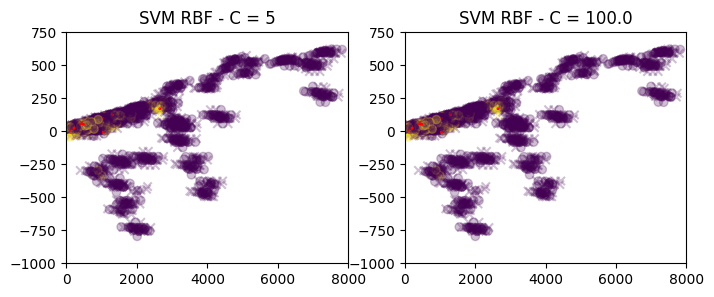

In [54]:
minx = 0
maxx = 8000

miny = -1000
maxy = 750

mesh_points = 300

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

xx1, xx2 = np.meshgrid(np.linspace(minx, maxx, mesh_points), np.linspace(miny, maxy, mesh_points))
#xx2 = np.meshgrid(np.linspace(miny, maxy, mesh_points), np.linspace(miny, maxy, mesh_points))

XX = np.concatenate([xx1.reshape(mesh_points ** 2, 1), xx2.reshape(mesh_points ** 2, 1)], axis=1)

ZZ_1 = svm_rbf_1_pca.decision_function(XX)
zz_1 = ZZ_1.reshape(mesh_points, mesh_points)

ZZ_2 = svm_rbf_2_pca.decision_function(XX)
zz_2 = ZZ_2.reshape(mesh_points, mesh_points)

fig_rbf, axs_rbf = plt.subplots(1, 2, figsize=(8, 3))
axs_rbf[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, marker='x', alpha=0.25)
axs_rbf[0].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, marker='o', alpha=0.25)
axs_rbf[0].contour(xx1, xx2, zz_1, [0], colors='red')
axs_rbf[0].contour(xx1, xx2, zz_1, [-1, 1], colors=['blue', 'orange'])
axs_rbf[0].set_title('SVM RBF - C = {}'.format(C1))
axs_rbf[1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, marker='x', alpha=0.25)
axs_rbf[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, marker='o', alpha=0.25)
axs_rbf[1].contour(xx1, xx2, zz_2, [0], colors='red')
axs_rbf[1].contour(xx1, xx2, zz_2, [-1, 1], colors=['blue', 'orange'])
axs_rbf[1].set_title('SVM RBF - C = {}'.format(C2))
plt.savefig('SVM_nonlineare_1.png', dpi=300, bbox_inches='tight')

## Training set ricampionato con ROS

In [55]:
X_train = X_train_res
y_train = y_train_res

### PCA preliminare

In [56]:
# faccio la PCA scalando i dati 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

pca = PCA(n_components = 2)
pca.fit(X_train_scaled)
df_pca = pd.DataFrame({'val': [pca.n_components_, pca.explained_variance_ratio_.sum()]}, index=['n. PC', 'expl. Var. (%)'])
display(df_pca)

,val
n. PC,2.000000
expl. Var. (%),0.491199


### Calcolo del SVM

In [57]:
# faccio una SVM non lineare provando con vari kernel

random_state = 42
ker_rbf = 'rbf'
gamma_rbf = 'auto'

C1 = 5
C2 = 1e2

# Inizializzazione SVM
svm_rbf_1 = SVC(C=C1, kernel=ker_rbf, gamma=gamma_rbf, random_state=random_state)
svm_rbf_2 = SVC(C=C2, kernel=ker_rbf, gamma=gamma_rbf, random_state=random_state)

# Addestramento SVM
svm_rbf_1.fit(X_train, y_train)
svm_rbf_2.fit(X_train, y_train)

# Dataframe con accuratezza su training e test set (visualizzare con funzione 'display')
df_svm_rbf = pd.DataFrame({'acc. (C1)': [svm_rbf_1.score(X_train, y_train), svm_rbf_1.score(X_test, y_test)],
                           'acc. (C2)': [svm_rbf_2.score(X_train, y_train), svm_rbf_2.score(X_test, y_test)]},
                          index=['training', 'test'])
display(df_svm_rbf)

y_pred = svm_rbf_1.predict(X_test)
print(classification_report(y_test, y_pred))

y_pred = svm_rbf_2.predict(X_test)
print(classification_report(y_test, y_pred))

,acc. (C1),acc. (C2)
training,0.993043,0.993623
test,0.869447,0.870354


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       930
           1       0.75      0.25      0.38       173

    accuracy                           0.87      1103
   macro avg       0.81      0.62      0.65      1103
weighted avg       0.86      0.87      0.84      1103

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       930
           1       0.76      0.25      0.38       173

    accuracy                           0.87      1103
   macro avg       0.82      0.62      0.65      1103
weighted avg       0.86      0.87      0.84      1103



In [58]:
# faccio una svm non lineare sui dati dopo aver applicato la PCA
# facendo rimanere solo due variabili

random_state = 42
ker_rbf = 'rbf'
gamma_rbf = 'auto'

C1 = 5
C2 = 1e2

# Inizializzazione SVM
svm_rbf_1_pca = SVC(C=C1, kernel=ker_rbf, gamma=gamma_rbf, random_state=random_state)
svm_rbf_2_pca = SVC(C=C2, kernel=ker_rbf, gamma=gamma_rbf, random_state=random_state)

# Addestramento SVM
svm_rbf_1_pca.fit(pca.transform(X_train), y_train)
svm_rbf_2_pca.fit(pca.transform(X_train), y_train)

# Dataframe con accuratezza su training e test set (visualizzare con funzione 'display')
df_svm_rbf_pca = pd.DataFrame({'acc. (C1)': [svm_rbf_1_pca.score(pca.transform(X_train), y_train), svm_rbf_1_pca.score(pca.transform(X_test), y_test)],
                           'acc. (C2)': [svm_rbf_2_pca.score(pca.transform(X_train), y_train), svm_rbf_2_pca.score(pca.transform(X_test), y_test)]},
                          index=['training', 'test'])
display(df_svm_rbf_pca)

,acc. (C1),acc. (C2)
training,0.989565,0.992464
test,0.867634,0.870354


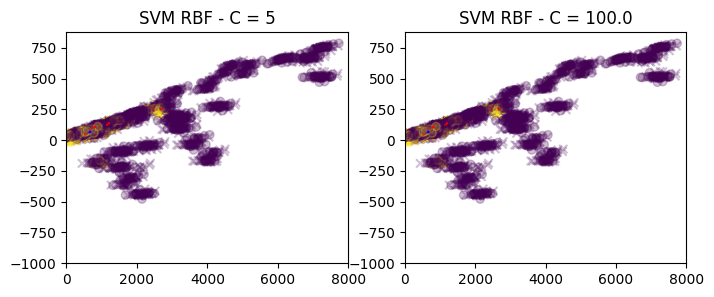

In [59]:
minx = 0
maxx = 8000

miny = -1000
maxy = 750

mesh_points = 300

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

xx1, xx2 = np.meshgrid(np.linspace(minx, maxx, mesh_points), np.linspace(miny, maxy, mesh_points))
#xx2 = np.meshgrid(np.linspace(miny, maxy, mesh_points), np.linspace(miny, maxy, mesh_points))

XX = np.concatenate([xx1.reshape(mesh_points ** 2, 1), xx2.reshape(mesh_points ** 2, 1)], axis=1)

ZZ_1 = svm_rbf_1_pca.decision_function(XX)
zz_1 = ZZ_1.reshape(mesh_points, mesh_points)

ZZ_2 = svm_rbf_2_pca.decision_function(XX)
zz_2 = ZZ_2.reshape(mesh_points, mesh_points)

fig_rbf, axs_rbf = plt.subplots(1, 2, figsize=(8, 3))
axs_rbf[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, marker='x', alpha=0.25)
axs_rbf[0].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, marker='o', alpha=0.25)
axs_rbf[0].contour(xx1, xx2, zz_1, [0], colors='red')
axs_rbf[0].contour(xx1, xx2, zz_1, [-1, 1], colors=['blue', 'orange'])
axs_rbf[0].set_title('SVM RBF - C = {}'.format(C1))
axs_rbf[1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, marker='x', alpha=0.25)
axs_rbf[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, marker='o', alpha=0.25)
axs_rbf[1].contour(xx1, xx2, zz_2, [0], colors='red')
axs_rbf[1].contour(xx1, xx2, zz_2, [-1, 1], colors=['blue', 'orange'])
axs_rbf[1].set_title('SVM RBF - C = {}'.format(C2))
plt.savefig('SVM_nonlineare_2.png', dpi=300, bbox_inches='tight')

## Training set ricampionato con SMOTE

In [60]:
X_train = X_train_smo
y_train = y_train_smo

### PCA preliminare

In [61]:
# faccio la PCA scalando i dati 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

pca = PCA(n_components = 2)
pca.fit(X_train_scaled)
df_pca = pd.DataFrame({'val': [pca.n_components_, pca.explained_variance_ratio_.sum()]}, index=['n. PC', 'expl. Var. (%)'])
display(df_pca)

,val
n. PC,2.000000
expl. Var. (%),0.499166


### Calcolo del SVM

In [62]:
# faccio una SVM non lineare provando con vari kernel

random_state = 42
ker_rbf = 'rbf'
gamma_rbf = 'auto'

C1 = 5
C2 = 1e2

# Inizializzazione SVM
svm_rbf_1 = SVC(C=C1, kernel=ker_rbf, gamma=gamma_rbf, random_state=random_state)
svm_rbf_2 = SVC(C=C2, kernel=ker_rbf, gamma=gamma_rbf, random_state=random_state)

# Addestramento SVM
svm_rbf_1.fit(X_train, y_train)
svm_rbf_2.fit(X_train, y_train)

# Dataframe con accuratezza su training e test set (visualizzare con funzione 'display')
df_svm_rbf = pd.DataFrame({'acc. (C1)': [svm_rbf_1.score(X_train, y_train), svm_rbf_1.score(X_test, y_test)],
                           'acc. (C2)': [svm_rbf_2.score(X_train, y_train), svm_rbf_2.score(X_test, y_test)]},
                          index=['training', 'test'])
display(df_svm_rbf)

y_pred = svm_rbf_1.predict(X_test)
print(classification_report(y_test, y_pred))

y_pred = svm_rbf_2.predict(X_test)
print(classification_report(y_test, y_pred))

,acc. (C1),acc. (C2)
training,0.993043,0.993913
test,0.871260,0.871260


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       930
           1       0.76      0.26      0.39       173

    accuracy                           0.87      1103
   macro avg       0.82      0.62      0.66      1103
weighted avg       0.86      0.87      0.84      1103

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       930
           1       0.76      0.26      0.39       173

    accuracy                           0.87      1103
   macro avg       0.82      0.62      0.66      1103
weighted avg       0.86      0.87      0.84      1103



In [63]:
# faccio una svm non lineare sui dati dopo aver applicato la PCA
# facendo rimanere solo due variabili

random_state = 42
ker_rbf = 'rbf'
gamma_rbf = 'auto'

C1 = 5
C2 = 1e2

# Inizializzazione SVM
svm_rbf_1_pca = SVC(C=C1, kernel=ker_rbf, gamma=gamma_rbf, random_state=random_state)
svm_rbf_2_pca = SVC(C=C2, kernel=ker_rbf, gamma=gamma_rbf, random_state=random_state)

# Addestramento SVM
svm_rbf_1_pca.fit(pca.transform(X_train), y_train)
svm_rbf_2_pca.fit(pca.transform(X_train), y_train)

# Dataframe con accuratezza su training e test set (visualizzare con funzione 'display')
df_svm_rbf_pca = pd.DataFrame({'acc. (C1)': [svm_rbf_1_pca.score(pca.transform(X_train), y_train), svm_rbf_1_pca.score(pca.transform(X_test), y_test)],
                           'acc. (C2)': [svm_rbf_2_pca.score(pca.transform(X_train), y_train), svm_rbf_2_pca.score(pca.transform(X_test), y_test)]},
                          index=['training', 'test'])
display(df_svm_rbf_pca)

,acc. (C1),acc. (C2)
training,0.989855,0.993333
test,0.864914,0.867634


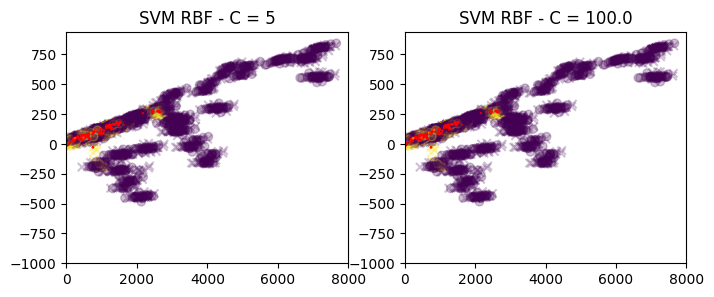

In [64]:
minx = 0
maxx = 8000

miny = -1000
maxy = 750

mesh_points = 300

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

xx1, xx2 = np.meshgrid(np.linspace(minx, maxx, mesh_points), np.linspace(miny, maxy, mesh_points))
#xx2 = np.meshgrid(np.linspace(miny, maxy, mesh_points), np.linspace(miny, maxy, mesh_points))

XX = np.concatenate([xx1.reshape(mesh_points ** 2, 1), xx2.reshape(mesh_points ** 2, 1)], axis=1)

ZZ_1 = svm_rbf_1_pca.decision_function(XX)
zz_1 = ZZ_1.reshape(mesh_points, mesh_points)

ZZ_2 = svm_rbf_2_pca.decision_function(XX)
zz_2 = ZZ_2.reshape(mesh_points, mesh_points)

fig_rbf, axs_rbf = plt.subplots(1, 2, figsize=(8, 3))
axs_rbf[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, marker='x', alpha=0.25)
axs_rbf[0].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, marker='o', alpha=0.25)
axs_rbf[0].contour(xx1, xx2, zz_1, [0], colors='red')
axs_rbf[0].contour(xx1, xx2, zz_1, [-1, 1], colors=['blue', 'orange'])
axs_rbf[0].set_title('SVM RBF - C = {}'.format(C1))
axs_rbf[1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, marker='x', alpha=0.25)
axs_rbf[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, marker='o', alpha=0.25)
axs_rbf[1].contour(xx1, xx2, zz_2, [0], colors='red')
axs_rbf[1].contour(xx1, xx2, zz_2, [-1, 1], colors=['blue', 'orange'])
axs_rbf[1].set_title('SVM RBF - C = {}'.format(C2))
plt.savefig('SVM_nonlineare_3.png', dpi=300, bbox_inches='tight')

# MLP

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_val_p, stratify=y, random_state=random_seed, shuffle=True) 

In [66]:
# inizializzo una MLP generica
val_p = 0.23 # così ottengo circa il 15% di validation
hidden_layer_sizes = [16,32,32,16]
activation = 'relu'
patience = 50
max_epochs = 500
verbose = True
batch_sz = 8

mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                    activation=activation,
                    early_stopping=True,
                    n_iter_no_change=patience,
                    max_iter=max_epochs,
                    validation_fraction=val_p,
                    batch_size=batch_sz,
                    verbose=verbose,
                    random_state=random_state,
                    solver='adam',
                    learning_rate='adaptive'
                   )

## Training set originale

In [67]:
# Addestramento MLP
mlp.fit(X_train, y_train)

Iteration 1, loss = 2.10514698
Validation score: 0.845011
Iteration 2, loss = 1.47669216
Validation score: 0.836518
Iteration 3, loss = 1.44493788
Validation score: 0.840764
Iteration 4, loss = 1.09438048
Validation score: 0.838641
Iteration 5, loss = 1.03623905
Validation score: 0.836518
Iteration 6, loss = 0.62556565
Validation score: 0.840764
Iteration 7, loss = 0.61305829
Validation score: 0.836518
Iteration 8, loss = 0.81024086
Validation score: 0.821656
Iteration 9, loss = 0.66923408
Validation score: 0.840764
Iteration 10, loss = 0.47953150
Validation score: 0.842887
Iteration 11, loss = 0.51390427
Validation score: 0.836518
Iteration 12, loss = 0.58811191
Validation score: 0.828025
Iteration 13, loss = 0.75096631
Validation score: 0.796178
Iteration 14, loss = 0.42043257
Validation score: 0.834395
Iteration 15, loss = 0.55434095
Validation score: 0.861996
Iteration 16, loss = 0.49258313
Validation score: 0.836518
Iteration 17, loss = 0.40575395
Validation score: 0.845011
Iterat

MLPClassifier(batch_size=8, early_stopping=True,
              hidden_layer_sizes=[16, 32, 32, 16], learning_rate='adaptive',
              max_iter=500, n_iter_no_change=50, random_state=42,
              validation_fraction=0.23, verbose=True)

In [68]:
# Performance

y_pred_trainval = mlp.predict(X_train)
y_pred = mlp.predict(X_test)

acc_trainval = mlp.score(X_train, y_train)
prec_trainval = precision_score(y_train, y_pred_trainval, average='weighted')
rec_trainval = recall_score(y_train, y_pred_trainval, average='weighted')
f1_trainval = f1_score(y_train, y_pred_trainval, average='weighted')

acc = mlp.score(X_test, y_test)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

df_perf = pd.DataFrame({'Accuracy': [acc_trainval, acc], 
                        'Precision': [prec_trainval, prec], 
                        'Recall': [rec_trainval, rec],
                        'F1': [f1_trainval, f1]
                       },
                      index=['train. + val.', 'test'])

display(df_perf)

print(classification_report(y_test, y_pred))

,Accuracy,Precision,Recall,F1
train. + val.,0.914509,0.910496,0.914509,0.911587
test,0.902085,0.896622,0.902085,0.898214


              precision    recall  f1-score   support

           0       0.93      0.96      0.94       930
           1       0.73      0.60      0.66       173

    accuracy                           0.90      1103
   macro avg       0.83      0.78      0.80      1103
weighted avg       0.90      0.90      0.90      1103



## Training set ricampionato con ROS

In [69]:
X_train = X_train_res
y_train = y_train_res

In [70]:
# Addestramento MLP
mlp.fit(X_train, y_train)

Iteration 1, loss = 2.71012381
Validation score: 0.676322
Iteration 2, loss = 1.75856381
Validation score: 0.768262
Iteration 3, loss = 1.12140291
Validation score: 0.687657
Iteration 4, loss = 1.18000944
Validation score: 0.680101
Iteration 5, loss = 1.19459776
Validation score: 0.764484
Iteration 6, loss = 1.20780678
Validation score: 0.750630
Iteration 7, loss = 0.86523292
Validation score: 0.717884
Iteration 8, loss = 0.54635926
Validation score: 0.778338
Iteration 9, loss = 0.73356543
Validation score: 0.748111
Iteration 10, loss = 0.56228496
Validation score: 0.662469
Iteration 11, loss = 0.67333767
Validation score: 0.686398
Iteration 12, loss = 0.54743907
Validation score: 0.835013
Iteration 13, loss = 0.76350593
Validation score: 0.765743
Iteration 14, loss = 0.54359300
Validation score: 0.719144
Iteration 15, loss = 0.47271972
Validation score: 0.765743
Iteration 16, loss = 0.47386991
Validation score: 0.803526
Iteration 17, loss = 0.45299449
Validation score: 0.813602
Iterat

MLPClassifier(batch_size=8, early_stopping=True,
              hidden_layer_sizes=[16, 32, 32, 16], learning_rate='adaptive',
              max_iter=500, n_iter_no_change=50, random_state=42,
              validation_fraction=0.23, verbose=True)

In [71]:
# Performance

y_pred_trainval = mlp.predict(X_train)
y_pred = mlp.predict(X_test)

acc_trainval = mlp.score(X_train, y_train)
prec_trainval = precision_score(y_train, y_pred_trainval, average='weighted')
rec_trainval = recall_score(y_train, y_pred_trainval, average='weighted')
f1_trainval = f1_score(y_train, y_pred_trainval, average='weighted')

acc = mlp.score(X_test, y_test)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

df_perf = pd.DataFrame({'Accuracy': [acc_trainval, acc], 
                        'Precision': [prec_trainval, prec], 
                        'Recall': [rec_trainval, rec],
                        'F1': [f1_trainval, f1]
                       },
                      index=['train. + val.', 'test'])

display(df_perf)

print(classification_report(y_test, y_pred))

,Accuracy,Precision,Recall,F1
train. + val.,0.972464,0.973136,0.972464,0.972454
test,0.911151,0.927701,0.911151,0.916099


              precision    recall  f1-score   support

           0       0.98      0.92      0.95       930
           1       0.66      0.88      0.76       173

    accuracy                           0.91      1103
   macro avg       0.82      0.90      0.85      1103
weighted avg       0.93      0.91      0.92      1103



## Training set ricampionato con SMOTE

In [72]:
X_train = X_train_smo
y_train = y_train_smo

In [73]:
# Addestramento MLP
mlp.fit(X_train, y_train)

Iteration 1, loss = 2.95475735
Validation score: 0.696474
Iteration 2, loss = 1.97902464
Validation score: 0.760705
Iteration 3, loss = 2.12296961
Validation score: 0.600756
Iteration 4, loss = 0.91179071
Validation score: 0.775819
Iteration 5, loss = 1.00252252
Validation score: 0.785894
Iteration 6, loss = 0.79665451
Validation score: 0.780856
Iteration 7, loss = 0.63830066
Validation score: 0.678841
Iteration 8, loss = 0.69218409
Validation score: 0.774559
Iteration 9, loss = 0.66423475
Validation score: 0.777078
Iteration 10, loss = 0.63936849
Validation score: 0.794710
Iteration 11, loss = 0.51106372
Validation score: 0.803526
Iteration 12, loss = 0.54734434
Validation score: 0.783375
Iteration 13, loss = 0.53840164
Validation score: 0.764484
Iteration 14, loss = 0.49223731
Validation score: 0.822418
Iteration 15, loss = 0.46983254
Validation score: 0.798489
Iteration 16, loss = 0.43358219
Validation score: 0.831234
Iteration 17, loss = 0.54420807
Validation score: 0.824937
Iterat

MLPClassifier(batch_size=8, early_stopping=True,
              hidden_layer_sizes=[16, 32, 32, 16], learning_rate='adaptive',
              max_iter=500, n_iter_no_change=50, random_state=42,
              validation_fraction=0.23, verbose=True)

In [74]:
# Performance

y_pred_trainval = mlp.predict(X_train)
y_pred = mlp.predict(X_test)

acc_trainval = mlp.score(X_train, y_train)
prec_trainval = precision_score(y_train, y_pred_trainval, average='weighted')
rec_trainval = recall_score(y_train, y_pred_trainval, average='weighted')
f1_trainval = f1_score(y_train, y_pred_trainval, average='weighted')

acc = mlp.score(X_test, y_test)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

df_perf = pd.DataFrame({'Accuracy': [acc_trainval, acc], 
                        'Precision': [prec_trainval, prec], 
                        'Recall': [rec_trainval, rec],
                        'F1': [f1_trainval, f1]
                       },
                      index=['train. + val.', 'test'])

display(df_perf)

print(classification_report(y_test, y_pred))

,Accuracy,Precision,Recall,F1
train. + val.,0.963768,0.964206,0.963768,0.963760
test,0.918404,0.932261,0.918404,0.922561


              precision    recall  f1-score   support

           0       0.98      0.92      0.95       930
           1       0.68      0.89      0.77       173

    accuracy                           0.92      1103
   macro avg       0.83      0.91      0.86      1103
weighted avg       0.93      0.92      0.92      1103

